# Predicting Site Energy Usage Intensity

https://www.kaggle.com/c/widsdatathon2022/overview

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
print(f"Shape of training data is {df.shape} and the shape of the test set is {test_df.shape}")

Shape of training data is (75757, 64) and the shape of the test set is (9705, 63)


In [4]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
categorical_features = ['State_Factor', 'building_class', 'facility_type']
numerical_features = df.select_dtypes('number').columns

## Encode Data

In [14]:
#change type to category
df['State_Factor'] = df['State_Factor'].astype('category')
df['building_class'] = df['building_class'].astype('category')
df['facility_type'] = df['facility_type'].astype('category')


#encoding the field into a new column
df["cat_State_Factor"] = df["State_Factor"].cat.codes
df["cat_building_class"] = df["building_class"].cat.codes
df["cat_facility_type"] = df["facility_type"].cat.codes

In [16]:
print("State_Factor")
print(dict(enumerate(df['State_Factor'].cat.categories )))
print("building_class")
print(dict(enumerate(df['building_class'].cat.categories )))
print("facility_type")
print(dict(enumerate(df['facility_type'].cat.categories )))

State_Factor
{0: 'State_1', 1: 'State_10', 2: 'State_11', 3: 'State_2', 4: 'State_4', 5: 'State_6', 6: 'State_8'}
building_class
{0: 'Commercial', 1: 'Residential'}
facility_type
{0: '2to4_Unit_Building', 1: '5plus_Unit_Building', 2: 'Commercial_Other', 3: 'Commercial_Unknown', 4: 'Data_Center', 5: 'Education_College_or_university', 6: 'Education_Other_classroom', 7: 'Education_Preschool_or_daycare', 8: 'Education_Uncategorized', 9: 'Food_Sales', 10: 'Food_Service_Other', 11: 'Food_Service_Restaurant_or_cafeteria', 12: 'Food_Service_Uncategorized', 13: 'Grocery_store_or_food_market', 14: 'Health_Care_Inpatient', 15: 'Health_Care_Outpatient_Clinic', 16: 'Health_Care_Outpatient_Uncategorized', 17: 'Health_Care_Uncategorized', 18: 'Industrial', 19: 'Laboratory', 20: 'Lodging_Dormitory_or_fraternity_sorority', 21: 'Lodging_Hotel', 22: 'Lodging_Other', 23: 'Lodging_Uncategorized', 24: 'Mixed_Use_Commercial_and_Residential', 25: 'Mixed_Use_Predominantly_Commercial', 26: 'Mixed_Use_Predominan

In [18]:
df.facility_type.value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

#### We should do something to clean-up/group/minimize this list.

In [15]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,cat_State_Factor,cat_building_class,cat_facility_type
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,1.0,1.0,1.0,NaN,248.682615,0,0,0,13
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,1.0,NaN,1.0,12.0,26.500150,1,0,0,55
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,1.0,NaN,1.0,12.0,24.693619,2,0,0,48
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,1.0,NaN,1.0,12.0,48.406926,3,0,0,6
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,1.0,1.0,1.0,NaN,3.899395,4,0,0,56


## EDA

### Target

In the absence of a standard or benchmark it is difficult to compare the energy uses between buildings or structures. Simply measuring the amount of energy used per a chosen time period does not take into account building size, configuration or type of use. The use of an Energy Use Intensity (EUI) indicator provides the means to equalize the way that energy use is compared between various types of buildings, and evaluate the means of reducing overall energy consumption.

Certain property types will always use more energy than others. For example, an elementary school uses relatively little energy compared to a hospital.

https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui

https://www.archtoolbox.com/materials-systems/sustainability/energy-use-intensity.html

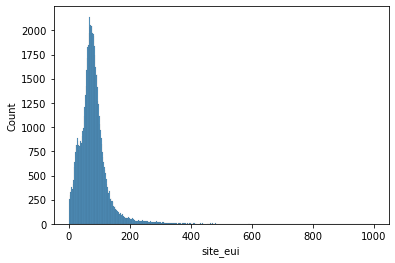

In [11]:
sns.histplot(data=df, x="site_eui")

In [12]:
df['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

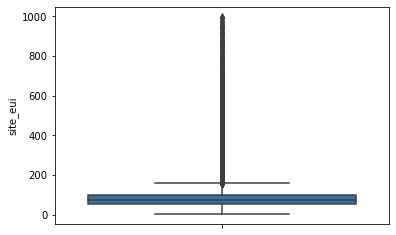

In [13]:
sns.boxplot(y="site_eui", data=df)

In [19]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,cat_State_Factor,cat_building_class,cat_facility_type
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000,4.237998,0.574970,25.931914
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509,1.549536,0.494351,11.645404
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000,4.000000,0.000000,27.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000,5.000000,1.000000,27.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000,5.000000,1.000000,30.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000,6.000000,1.000000,59.000000
